# Analysis Playground

In [ ]:
def graph_algorithm(graph, algorithm):
    algorithm_funcs = {
        'in_degree': lambda g: dict(g.in_degree()),
        'out_degree': lambda g: dict(g.out_degree()),
        'total_degree': lambda g: dict(g.degree()),
        'node_betweenness': lambda g: nx.betweenness_centrality(g, normalized=False),
        'edge_betweenness': lambda g: nx.edge_betweenness_centrality(g, normalized=False),
        'inward_closeness': lambda g: nx.closeness_centrality(g),
        'outward_closeness': lambda g: nx.closeness_centrality(g),
        'pagerank': nx.pagerank,
        'local_clustering_coefficient': nx.clustering,
        'weakly_connected_components': lambda g: list(nx.weakly_connected_components(g)),
        'strongly_connected_components': lambda g: list(nx.strongly_connected_components(g)),
        'density': nx.density,
        'global_clustering_coefficient': fca.global_clustering_coefficient,
        'trophic_incoherence': nx.trophic_incoherence_parameter,
        'trophic_levels': nx.trophic_levels,
        'node_connectivity': nx.node_connectivity,
        'edge_connectivity': nx.edge_connectivity,
        'minimum_node_cut': nx.minimum_node_cut,
        'minimum_edge_cut': nx.minimum_edge_cut,
        'apex_predators': fca.apex_predators,
        'basal_species': fca.basal_species,
        'cannibal_species': fca.cannibal_species,
        'shortest_path_length': fca.compute_shortest_path_length,
        'average_shortest_path_length': fca.average_shortest_path_length,
        'diameter': fca.diameter,
        'find_cliques': fca.find_cliques,
        'max_clique': nx.approximation.max_clique,
        'node_clique_number': nx.node_clique_number,
        'k_core': fca.k_core,
        'core_number': nx.core_number,
        'onion_layers': nx.onion_layers,
        'bridges': nx.bridges,
        'eccentricity': fca.eccentricity,
        'radius': fca.radius,
        'periphery': fca.periphery,
        'center': fca.center,
    }

    if algorithm not in algorithm_funcs:
        raise ValueError(f"Invalid algorithm: {algorithm}")

    return algorithm_funcs[algorithm](graph)


In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
#################################################
# Mock names for 10 nodes
names = [str(i) for i in range(0, 12)]

# Create a list of tuples for 25 edges
edges = [
    (names[0], names[10]),
    (names[0], names[11]),
    (names[10], names[11]),
    (names[0], names[2]),
    (names[1], names[2]),
    (names[1], names[4]),
    (names[2], names[5]),
    (names[3], names[4]),
    (names[3], names[6]),
    (names[4], names[5]),
    (names[4], names[7]),
    (names[6], names[7]),
    (names[6], names[9]),
    (names[7], names[8]),
    (names[2], names[4]),
    (names[6], names[8]),
    (names[1], names[5]),
    (names[2], names[6]),
    (names[4], names[8]),
    (names[5], names[7]),
    (names[1], names[7]),
    (names[2], names[7])
]

# Create a mock DataFrame
edge_data_df = pd.DataFrame(edges, columns=['Source_Name', 'Target_Name'])

# Add some mock edge attributes
edge_data_df['Weight'] = np.random.randint(1, 10, size=len(edge_data_df))
edge_data_df['Color'] = np.random.choice(['red', 'blue', 'green'], size=len(edge_data_df))

# Create an empty directed graph
G = nx.DiGraph()

# Iterate through the rows of the DataFrame and add edges with attributes
for _, row in tqdm(edge_data_df.iterrows(), total=len(edge_data_df)):
    source = row['Source_Name']
    target = row['Target_Name']
    edge_attrs = {k: v for k, v in row.items() if k not in ['Source_Name', 'Target_Name']}
    G.add_edge(source, target, **edge_attrs)

undirected_G = G.to_undirected()
################################################

100%|██████████| 22/22 [00:00<00:00, 9255.23it/s]


# Sub-graph Characterization
- k-clique
- k-core

### k-cliques

In [59]:
# Returns all maximal cliques in an undirected graph.
list(nx.find_cliques(undirected_G))

[['2', '0'],
 ['2', '7', '1', '5', '4'],
 ['2', '7', '6'],
 ['8', '7', '4'],
 ['8', '7', '6'],
 ['10', '11', '0'],
 ['3', '4'],
 ['3', '6'],
 ['9', '6']]

In [60]:
# approximates the maximal clique
nx.approximation.max_clique(undirected_G)

{'1', '4', '5', '7'}

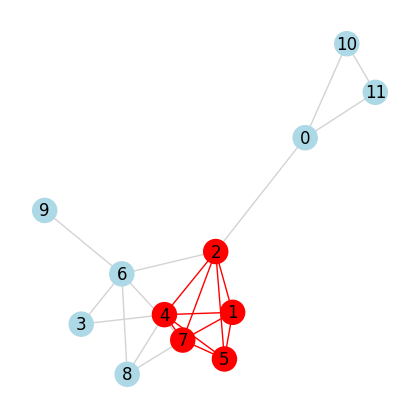

The largest clique:  ['2', '7', '1', '5', '4']


In [61]:
# Draw the maximum clique

# Compute all cliques
cliques = list(nx.find_cliques(undirected_G))

# Find the largest clique
largest_clique = max(cliques, key=len)

# Create a color map for the nodes
node_colors = []
for node in undirected_G.nodes:
    if node in largest_clique:
        node_colors.append('red')  # Color for nodes in the largest clique
    else:
        node_colors.append('lightblue')  # Color for all other nodes

# Similarly, create a color map for the edges
edge_colors = []
for edge in undirected_G.edges:
    if edge[0] in largest_clique and edge[1] in largest_clique:
        edge_colors.append('red')  # Color for edges in the largest clique
    else:
        edge_colors.append('lightgrey')  # Color for all other edges

# Draw the graph
plt.figure(figsize=(4, 4))
nx.draw(undirected_G, node_color=node_colors, edge_color=edge_colors, with_labels=True)
plt.show()

# Print the largest clique
print("The largest clique: ", largest_clique)

In [62]:
# Returns the size of the largest maximal clique containing each given node.
list(nx.node_clique_number(undirected_G))

['2', '0', '7', '1', '5', '4', '6', '8', '10', '11', '3', '9']

### k-cores

In [63]:
# Returns the k-core of G.

# define the range of k values
k_values = range(1, 11)  # replace 11 with the maximum k value you are interested in + 1

for k in k_values:
    # compute the k-core
    k_core = nx.k_core(undirected_G, k)
    # convert the k-core to a list of nodes
    k_core_nodes = list(k_core)
    # print the nodes in the k-core
    print(f"The {k}-core contains the nodes: {k_core_nodes}")

The 1-core contains the nodes: ['0', '10', '11', '2', '1', '4', '5', '3', '6', '7', '9', '8']
The 2-core contains the nodes: ['0', '10', '11', '2', '1', '4', '5', '3', '6', '7', '8']
The 3-core contains the nodes: ['2', '1', '4', '5', '6', '7', '8']
The 4-core contains the nodes: ['2', '7', '1', '4', '5']
The 5-core contains the nodes: []
The 6-core contains the nodes: []
The 7-core contains the nodes: []
The 8-core contains the nodes: []
The 9-core contains the nodes: []
The 10-core contains the nodes: []


In [64]:
# Returns the core number for each vertex.
nx.core_number(G)

{'0': 2,
 '10': 2,
 '11': 2,
 '2': 4,
 '1': 4,
 '4': 4,
 '5': 4,
 '3': 2,
 '6': 3,
 '7': 4,
 '9': 1,
 '8': 3}

The 4-core contains the nodes: ['2', '7', '1', '4', '5']


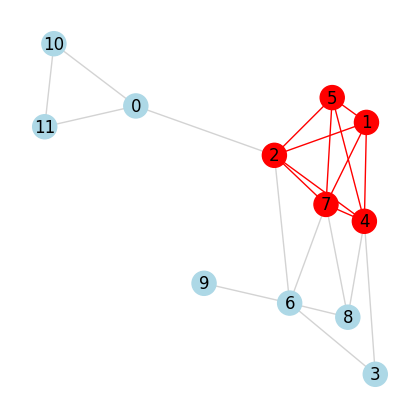

In [65]:
# define the range of k values
k_values = range(1, 11)  # replace 11 with the maximum k value you are interested in + 1

k_core_nodes = []
k = 0

# Find the last k-core with non-zero nodes
for k in k_values:
    # compute the k-core
    k_core = nx.k_core(undirected_G, k)
    # convert the k-core to a list of nodes
    nodes = list(k_core)

    if len(nodes) == 0:
        break

    k_core_nodes = nodes

# Decrease k since we increased it one time too many in the loop
k -= 1

print(f"The {k}-core contains the nodes: {k_core_nodes}")

# Create a color map for the nodes
node_colors = ["red" if node in k_core_nodes else "lightblue" for node in undirected_G.nodes]

# Similarly, create a color map for the edges
edge_colors = ["red" if edge[0] in k_core_nodes and edge[1] in k_core_nodes else "lightgrey" for edge in undirected_G.edges]

# Draw the graph
plt.figure(figsize=(4, 4))
nx.draw(undirected_G, node_color=node_colors, edge_color=edge_colors, with_labels=True)
plt.show()

Layer 1: ['9']
Layer 2: ['10', '11', '3']
Layer 3: ['0']
Layer 4: ['6', '8']
Layer 5: ['2', '1', '4', '5', '7']


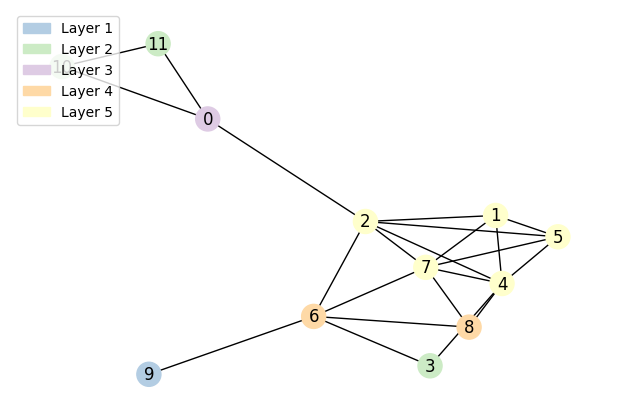

In [66]:
import matplotlib.patches as mpatches

# Generate onion layers
onion_layers = nx.onion_layers(undirected_G)

# Get unique layers
unique_layers = set(onion_layers.values())

# Print layers
for layer in sorted(unique_layers):
    nodes_in_layer = [node for node, node_layer in onion_layers.items() if node_layer == layer]
    print(f"Layer {layer}: {nodes_in_layer}")

# Create a color map for nodes, based on their onion layer
color_map = plt.get_cmap("Pastel1")
node_colors = [color_map(onion_layers[node]) for node in undirected_G.nodes()]

# Draw the graph
plt.figure(figsize=(6, 4))
nx.draw(undirected_G, node_color=node_colors, with_labels=True)

# Create a legend
patches = [mpatches.Patch(color=color_map(layer), label=f'Layer {layer}') for layer in unique_layers]
plt.legend(handles=patches, loc='upper left')

plt.show()

# Boundary
- subgraph - graph edge boundary
- subgraph - subgraph edge boundary

In [67]:
# subgraph - graph edge boundary
layer_5 = [node for node, node_layer in onion_layers.items() if node_layer == 5]
list(nx.edge_boundary(undirected_G, layer_5))

[('2', '0'), ('2', '6'), ('7', '6'), ('7', '8'), ('4', '8'), ('4', '3')]

In [68]:
# subgraph - subgraph edge boundary

layer_4 = [node for node, node_layer in onion_layers.items() if node_layer == 4]

# Retrieve edges connecting layer_3 and layer_4
connecting_edges = set()
for u in layer_4:
    for v in layer_5:
        if undirected_G.has_edge(u, v):
            connecting_edges.add((u, v))

# Print the connecting edges
print("Edges connecting layer_3 and layer_4:")
print(connecting_edges)

Edges connecting layer_3 and layer_4:
{('6', '7'), ('6', '2'), ('8', '4'), ('8', '7')}


# Bridges
- has_bridges
- bridges
- local_bridges

In [69]:
# has_bridges

nx.has_bridges(undirected_G)

True

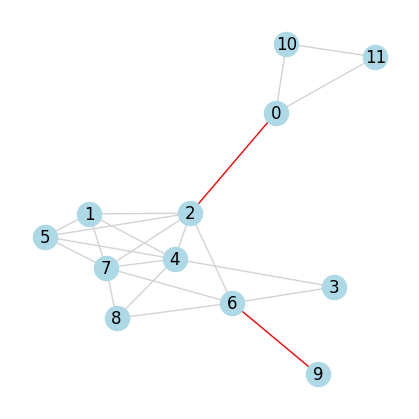

In [70]:
# bridges

# Obtain the list of bridge edges
bridges = list(nx.bridges(undirected_G))

# Create a color map for the edges
edge_colors = []
for edge in undirected_G.edges:
    if edge in bridges:
        edge_colors.append('red')  # Color for bridge edges
    else:
        edge_colors.append('lightgrey')  # Color for non-bridge edges

# Draw the graph
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(undirected_G)
nx.draw(undirected_G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors)
plt.show()

In [71]:
# local_bridges

# A local bridge is an edge whose endpoints have no common neighbors. That is, the edge is not part of a triangle in the graph.
list(nx.local_bridges(undirected_G, with_span=False))

[('0', '2'), ('4', '3'), ('3', '6'), ('6', '9')]

# Paths

In [72]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.chains.chain_decomposition.html#networkx.algorithms.chains.chain_decomposition
list(nx.chain_decomposition(undirected_G))

[[('0', '11'), ('11', '10'), ('10', '0')],
 [('2', '1'), ('1', '5'), ('5', '2')],
 [('2', '4'), ('4', '1')],
 [('2', '7'), ('7', '4')],
 [('2', '6'), ('6', '7')],
 [('5', '4')],
 [('5', '7')],
 [('1', '7')],
 [('4', '3'), ('3', '6')],
 [('4', '8'), ('8', '6')],
 [('7', '8')]]

In [73]:
# Compute the number of triangles.
nx.triangles(undirected_G)

{'0': 1,
 '10': 1,
 '11': 1,
 '2': 7,
 '1': 6,
 '4': 7,
 '5': 6,
 '3': 0,
 '6': 2,
 '7': 9,
 '9': 0,
 '8': 2}

In [74]:
# Possible triangles are identified by the number of “triads” (two edges with a shared vertex).
nx.transitivity(undirected_G)

0.5526315789473685

In [75]:
# communities https://networkx.org/documentation/stable/reference/algorithms/community.html

In [76]:
# connectivity https://networkx.org/documentation/stable/reference/algorithms/connectivity.html

In [3]:
# A simple cycle, or elementary circuit, is a closed path where no node appears twice. In a directed graph, two simple cycles are distinct if they are not cyclic permutations of each other. In an undirected graph, two simple cycles are distinct if they are not cyclic permutations of each other nor of the other’s reversal.

list(nx.simple_cycles(G))

[]

In [79]:
# link_prediction https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html

In [4]:
nx.reciprocity(G)

0.0

# MODULARITY

In [5]:
# TODO: check if graph connected
nx.modularity_matrix(undirected_G)

array([[-0.20454545,  0.86363636,  0.86363636,  0.59090909, -0.27272727,
        -0.40909091, -0.27272727, -0.13636364, -0.34090909, -0.40909091,
        -0.06818182, -0.20454545],
       [ 0.86363636, -0.09090909,  0.90909091, -0.27272727, -0.18181818,
        -0.27272727, -0.18181818, -0.09090909, -0.22727273, -0.27272727,
        -0.04545455, -0.13636364],
       [ 0.86363636,  0.90909091, -0.09090909, -0.27272727, -0.18181818,
        -0.27272727, -0.18181818, -0.09090909, -0.22727273, -0.27272727,
        -0.04545455, -0.13636364],
       [ 0.59090909, -0.27272727, -0.27272727, -0.81818182,  0.45454545,
         0.18181818,  0.45454545, -0.27272727,  0.31818182,  0.18181818,
        -0.13636364, -0.40909091],
       [-0.27272727, -0.18181818, -0.18181818,  0.45454545, -0.36363636,
         0.45454545,  0.63636364, -0.18181818, -0.45454545,  0.45454545,
        -0.09090909, -0.27272727],
       [-0.40909091, -0.27272727, -0.27272727,  0.18181818,  0.45454545,
        -0.81818182,  

# EDGE BETWEENNESS

In [ ]:
# takes only 2000 nodes?

%%time
edge_betweenness = nx.edge_betweenness_centrality(G, k=2000)